# Прогноз потенциально популярных игровых продуктов

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


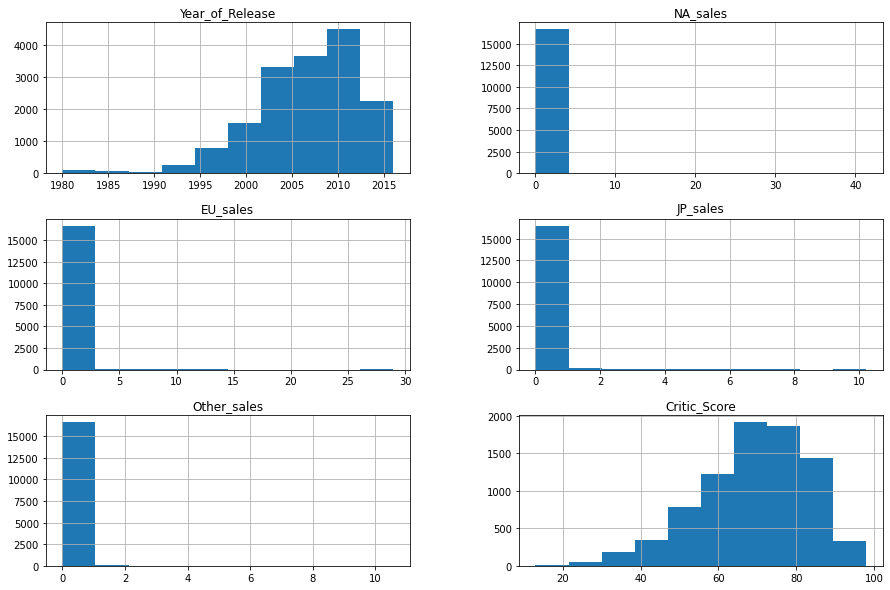

In [5]:
df.hist(figsize=(15, 10));

Описание данных:


* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales`— продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

Вывод:

Нужно провести предобработку данных, названия столбцов привести к snake_case, проверить на дубликаты, избавиться от пропущенных значений, там где это возможно.

### Подготовьте данные
* [x] Замените названия столбцов (приведите к нижнему регистру);
* [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* [x] Обработайте пропуски при необходимости:
* [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* [x] Опишите причины, которые могли привести к пропускам;
* [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Замените названия столбцов

In [6]:
#Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

#### Обработайте пропуски при необходимости

In [7]:
#посчитаем пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#выведем пропуски стоблца name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Изабавимся от пропусков в столбце `name` и `genre`

In [9]:
#убираем пропуски в name и genre
df = df.dropna(subset=['name']).reset_index(drop=True)

In [10]:
#найдем долю пропущенных значений
nan = df['year_of_release'].isna().sum() / len(df)
print(f'В столбце year_of_release, {nan:.1%} пропущенных значений')

В столбце year_of_release, 1.6% пропущенных значений


`1.6%` не повлияют на анализ, можем их отбросить, чтобы не мешали расчетам.

In [11]:
#убираем пропуски в year_of_release
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

В `crirtic_store` заполним пропуски `-1`, чтобы не мешали расчетам

In [12]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [13]:
#посчитаем количество пропусков с толбцах
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

В столбцах `user_score` и `rating` оставим пропуски т.к. они не помешают расчетам

Возможные причины пропусков:

* Данные просто не заполнили
* Игра старая и в то время просто не оценивали игры по рейтингу
* Игра не популярна и не оценивалась широкой массой

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [14]:
#посмотрим информацию о df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбец `year_of_release` может быть только целым цислом.

In [15]:
#меняем тип данных на int
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце `critic_score` после запятой отсутсвуют значения. Переведем в формат `int` и заполним пропуски `-1`, чтобы не мешали расчетам.

In [16]:
#меняем тип данных на int
df['critic_score'] = df['critic_score'].round(0).astype('int')

Столбец `user_score` имеет тип `object`, хотя хранит числовые значения.

In [17]:
#выведем уникальные значения столбца user_score
df['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Значение `tbd` в столбце `user_score` означает To Be Determined, то есть "Будет определено". Релиз игры еще не состоялся, поэтому нет оценки. `tbd` заменим на пропуски, а тип данных в столбце заменим на `float`.

In [18]:
#меняем tbd на NaN
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
#меняем тип данных на float
df['user_score'] = df['user_score'].astype('float')

Приставка `Nintendo DS` вышла в `2004` году, однако в данных есть игра `Strongest Tokyo University Shogi DS` выпущенная для этой платформы в `1985` году - это аномальное значение, отбросим его.

In [19]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,NaN,NaN


In [20]:
df = df.drop(df[df['name'] == 'Strongest Tokyo University Shogi DS'].index)

Проверим уникальные значения столбца `rating`.

In [21]:
#выведем уникальные значения столбца user_score
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в столбце `rating` заполним значением `ND` - Not Defined (не определен).

Рейинг `K-A` является не актуальным, в 1998 году он был переименован в `Е`. Поэтому и мы заменим это значение на соответсвующие.

In [22]:
#заполним пропуски
df['rating'] = df['rating'].fillna('ND')
#поменяем значение
df['rating'] = df['rating'].replace('K-A', 'E')

Проверим уникальные значения столбца `rating`.

In [23]:
df['genre'].sort_values(ascending=False).unique()

array(['Strategy', 'Sports', 'Simulation', 'Shooter', 'Role-Playing',
       'Racing', 'Puzzle', 'Platform', 'Misc', 'Fighting', 'Adventure',
       'Action'], dtype=object)

Проверим количество дубликатов

In [24]:
df.duplicated().sum()

0

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [25]:
#создадим столбец с суммарными продажами во всех регионах
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Вывод: 

* Привели стобцы к `snake_case`.
* Преобразовали данные в нужные типы.
* Избавились от пропусков в столбцах `name`, `genre`, `year_of_release`, `critic_score`.
* Изменили рейинг `K-A` на `E`.
* Добавили столец с продажами во всех регионах.

### Проведите исследовательский анализ данных

* [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* [x] Не учитывайте в работе данные за предыдущие годы.
* [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* [x] Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* [x] Соотнесите выводы с продажами игр на других платформах.
* [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрите, сколько игр выпускалось в разные годы

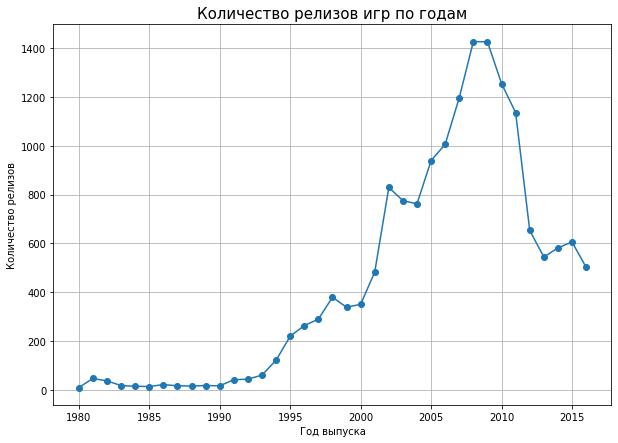

In [26]:
#построим график количества релизов игр в разные года
plt.figure(figsize=(10,7))
plt.plot(df.groupby('year_of_release')['name'].count(), 'o-')
plt.title('Количество релизов игр по годам', fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.grid(True);

До `1990` года игр выпускалось каждый год примерное одинаковое количество игр, игры были еще не так популярны как и сами игровые приставки

C `1991` гожда начинается рост продаж игр, а `2000-е` годы показывют резкий рост популярности игровой индустрии. ПК и Консоли стали доступнее, а игры стали популярным времяпровождением.

Пиком релизов является `2008 и 2009` год, далее линия идет на спад, возможно повлиял мировой кризис `2008` года

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [27]:
#создадим сводную таблицу
platform_stat = (
    df
    .pivot_table(index='platform', 
                 values='total_sales', 
                 aggfunc='sum'
                )
    .sort_values(by='total_sales',
                 ascending=False)
    .reset_index()
)
#отберем топ 10 платформ по продажам
platform_stat_top_10 = platform_stat.head(10)

In [28]:
# создадим сводную таблицу
life_time = (
    df
    .pivot_table(index='platform', 
                 values='year_of_release', 
                 aggfunc=['min', 'max']
                )
    .reset_index()
)

# переименуем столбцы
life_time.columns = ('platform', 'first_year', 'last_year')
#добавим столбце с продолжительнотью жизни платформы
life_time['life_expectancy'] = life_time['last_year'] - life_time['first_year']
#топ 10 платформ по продолжительности жизни
life_time_top_10 = life_time.sort_values(by='life_expectancy', ascending=False).head(10)
 
print('Средння продолжительность жизни платформы:', life_time['life_expectancy'].mean().round(1))

Средння продолжительность жизни платформы: 7.0


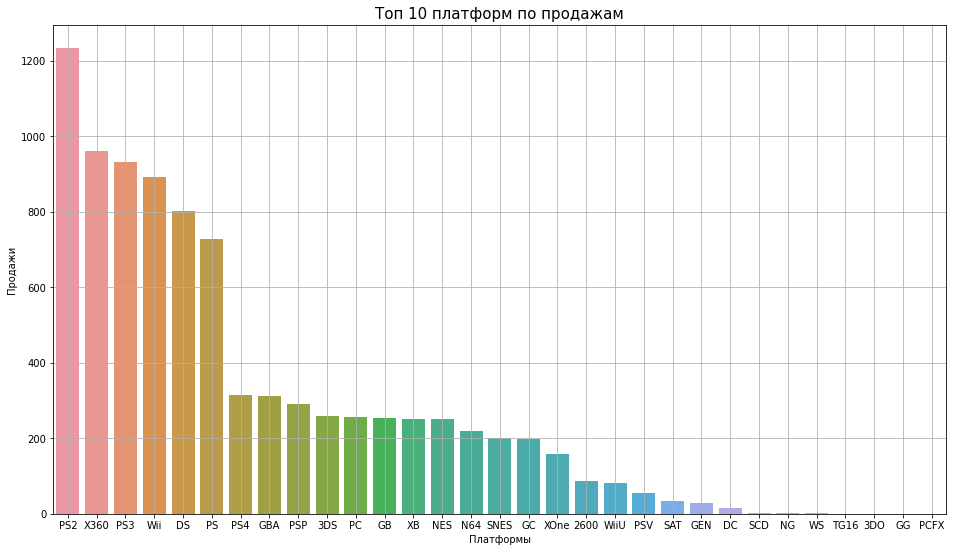

In [29]:
#построим диаграмму
plt.figure(figsize=(16,9))
plt.title('Топ 10 платформ по продажам', fontsize=15)
sns.barplot(y=platform_stat['total_sales'], x=platform_stat['platform'])
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.grid(True);

Тройку лидеров по продажам за все время занимают `стационарные игровые консоли (PS2, X360, PS3)`

Рассмотрим продажи топ 10-ти платформ по отдельности

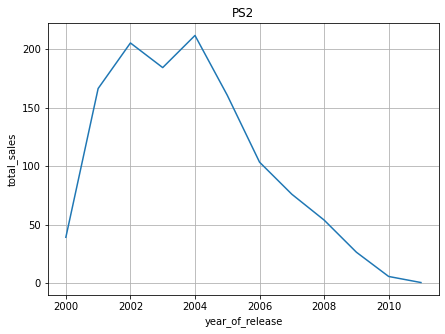

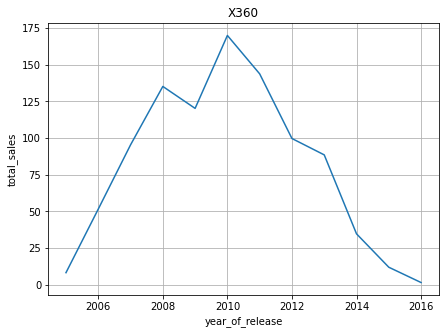

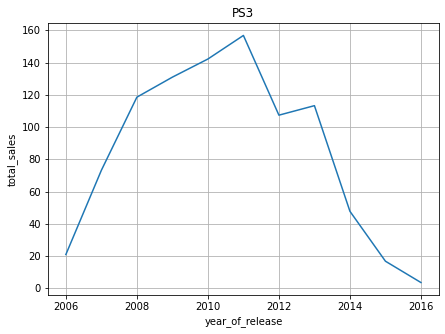

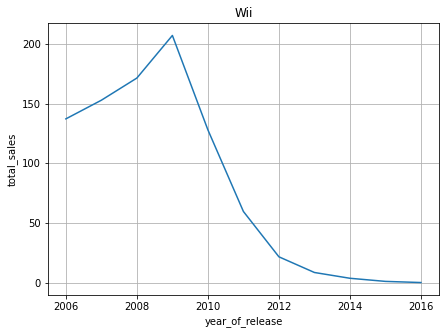

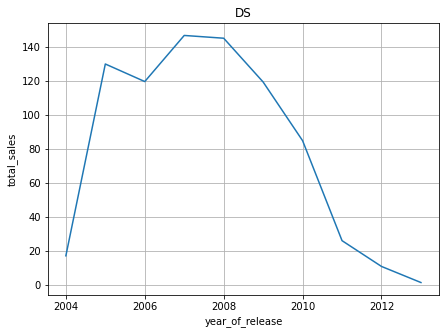

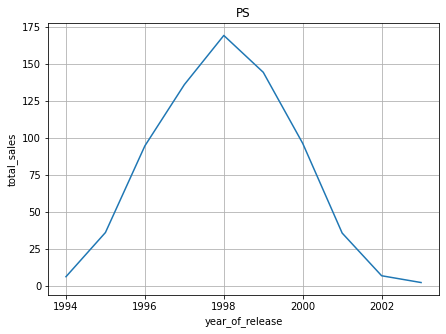

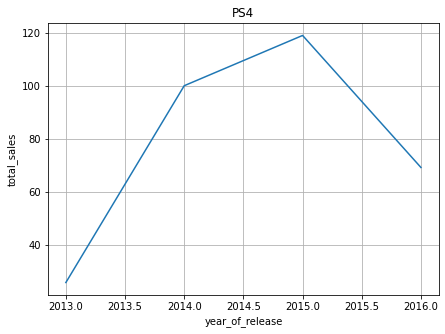

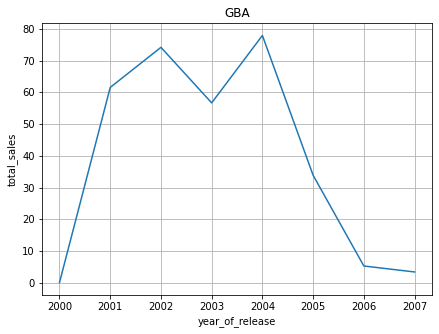

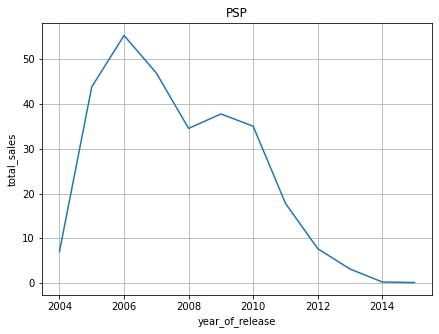

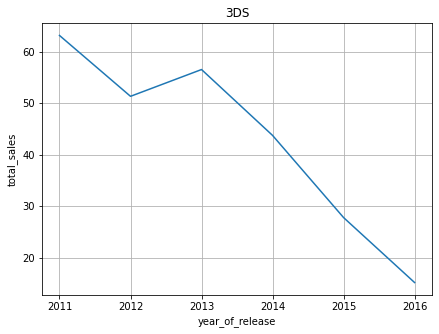

In [30]:
#построим диаграммы для топ 10 платформ с помощью цикла
for i in platform_stat_top_10['platform'].unique():
    plt.figure(figsize=(7,5))
    df[df['platform'] == i].groupby('year_of_release')['total_sales'].sum().plot()
    plt.title(i)
    plt.ylabel('total_sales')
    plt.grid(True)
    plt.show();

Графики показывают, что в основном пик продаж приходится примерно в период `4-х` лет, потом продажи идут на спад.

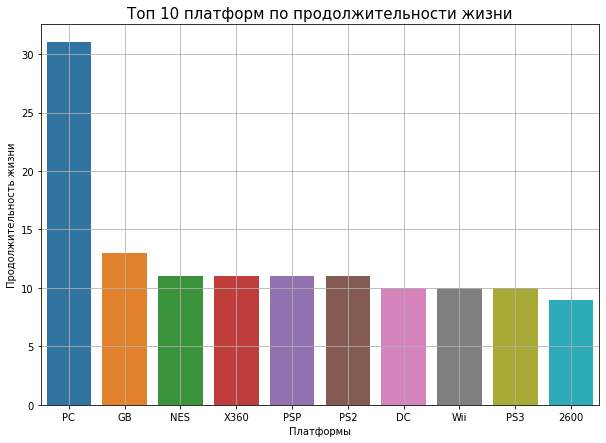

In [31]:
#построим диаграмму
plt.figure(figsize=(10,7))
plt.title('Топ 10 платформ по продолжительности жизни', fontsize=15)
sns.barplot(y=life_time_top_10['life_expectancy'], x =life_time_top_10['platform'])
plt.xlabel('Платформы')
plt.ylabel('Продолжительность жизни')
plt.grid(True);

Если рассматривать конкретные платформы, то самой долгоживущей будет `ПК` - `31` год.

У остальных платформ продолжительность жизни оченб близка друг к другу.

У `ПК` нет модельного ряда, как например у `Xbox` или `PlayStation`, устаревшие консоли заменяют новые модели, поэтому их продолжительность жизни меньше.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато.

In [32]:
#выберем игры начиная с 2012 года
good_df = df.query('2014 <= year_of_release')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

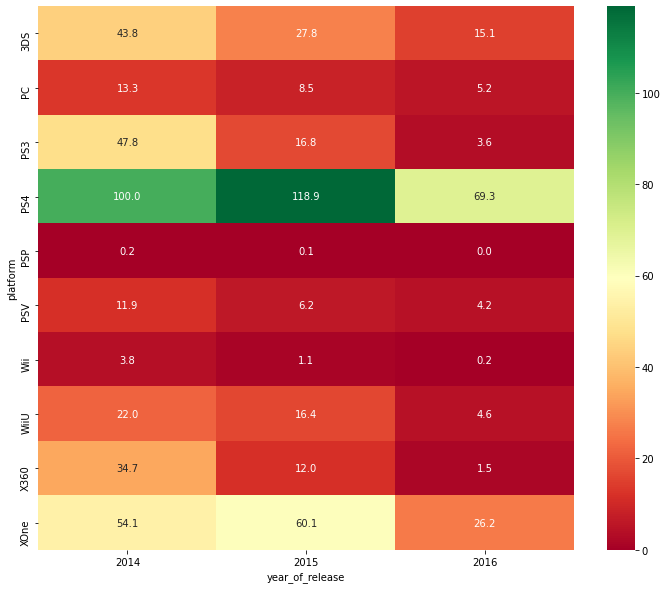

In [33]:
#сводная таблица продаж по годам
sales_of_year = (
    good_df
    .pivot_table(index='platform',
                 columns='year_of_release',
                 values='total_sales',
                 aggfunc='sum'
                )
    .fillna(0)
)
#построим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(sales_of_year, cmap='RdYlGn',  annot=True, fmt='.1f');

Из данных видно, что `PlayStation 4`, `XBox One` находятся на подъеме и являются актуальными. 

`Nintendo 3DS` и `Wii U` хоть и показывают спад, но все еще остаются актуальными платформами.

`ПК` показывает стабильность. 

`XBox 360`, `PlayStation 3` и `PlayStation Vita` идут на спад популярности. 

А `Wii` и `PSP` вовсе неактуальны.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

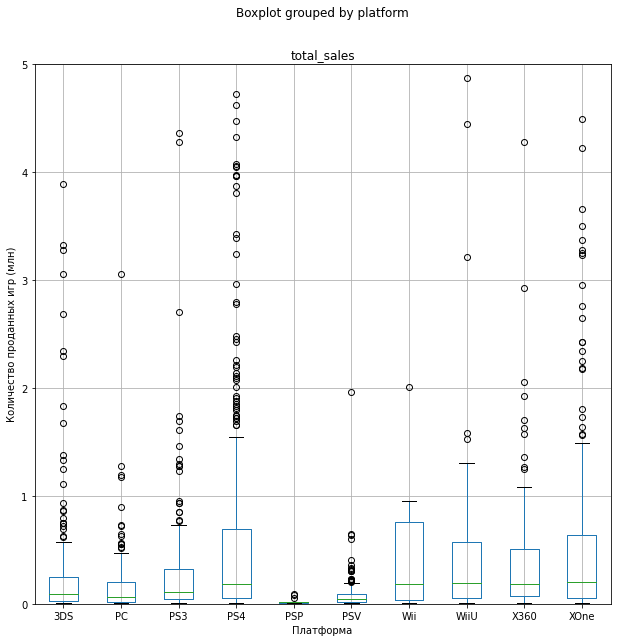

In [34]:
#простроим диаграмму размаха
good_df.boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр (млн)')
plt.ylim(0, 5)
plt.show()

`PS4` и `XBox One` являются лидерами продаж, большой размах усов этих консолей показывает, что бестселерами можно считать игры с продажами больше `1.8 млн` копий.

`PSP` и `PSV` показывают худший результат.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

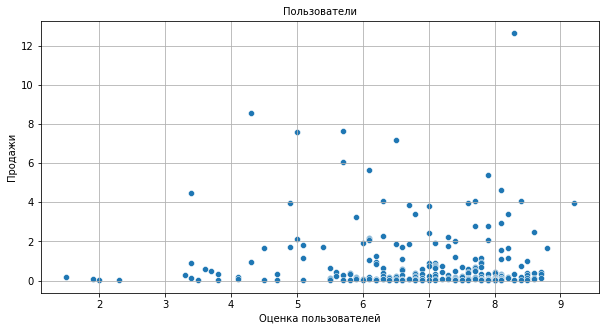

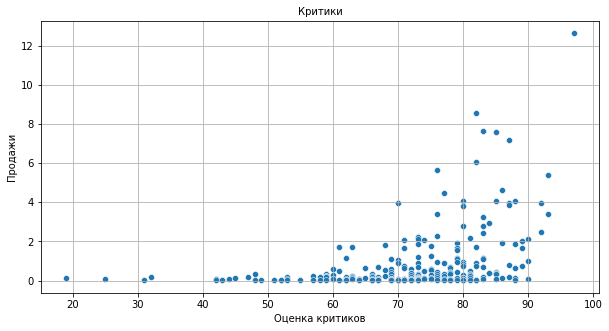

In [35]:
#отберем данные по PS4
ps4 = good_df.query('platform == "PS4" and critic_score != -1') # отберем данные

#простроим диаграммы рассеяния
plt.figure(figsize=(10, 5))

plt.title('Пользователи', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Критики', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.grid(True)
plt.show();

In [36]:
#выведем корреляцию
user = ps4['user_score'].corr(ps4['total_sales'])
critic = ps4['critic_score'].corr(ps4['total_sales'])

print(f'Корреляция оценки критиков и продаж: {critic:.2}')
print(f'Корреляция оценки пользователей и продаж: {user:.2}')

Корреляция оценки критиков и продаж: 0.4
Корреляция оценки пользователей и продаж: -0.043


Корреляция оценки критиков и продаж показывает `умеренную` зависимсоть.

А по корреляции оценок пользователей можно сказать, что они `не влияют` на продажи.

#### Соотнесите выводы с продажами игр на других платформах.

Графики для PS4


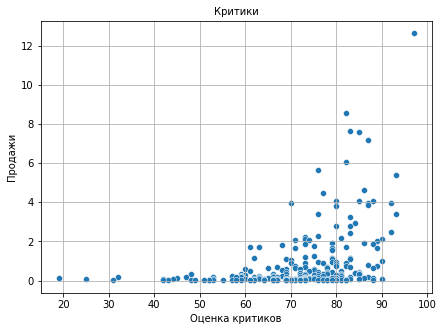

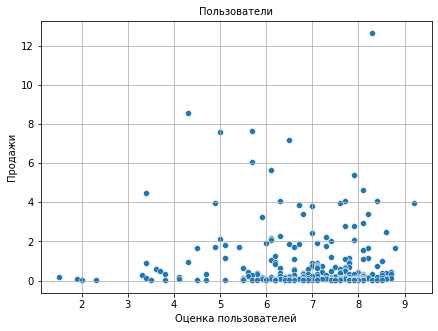

Графики для 3DS


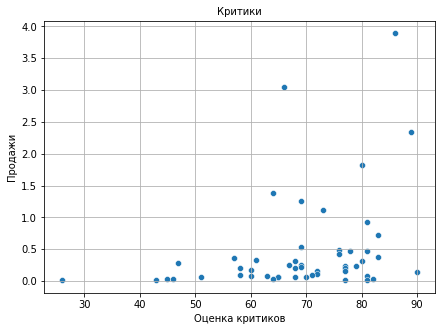

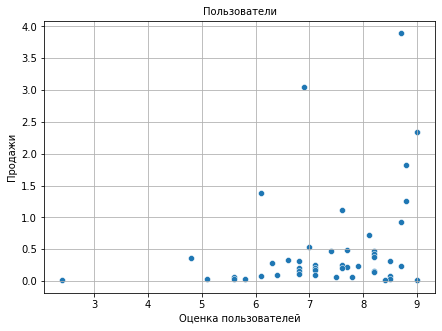

Графики для XOne


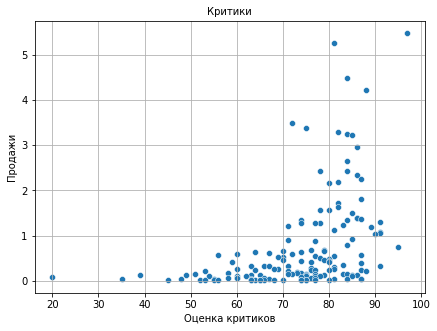

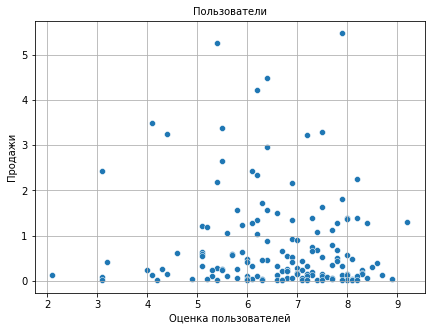

Графики для WiiU


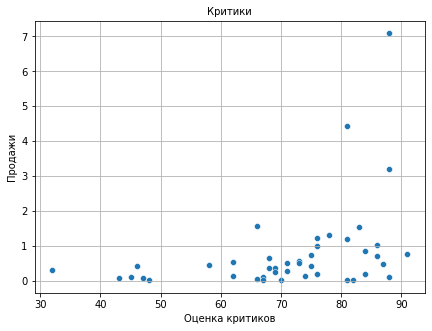

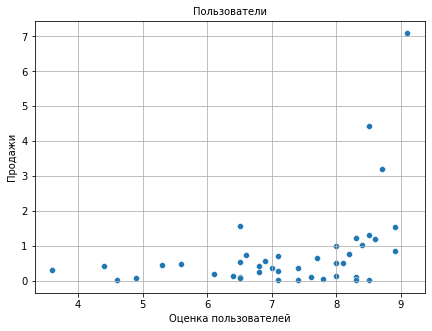

Графики для PS3


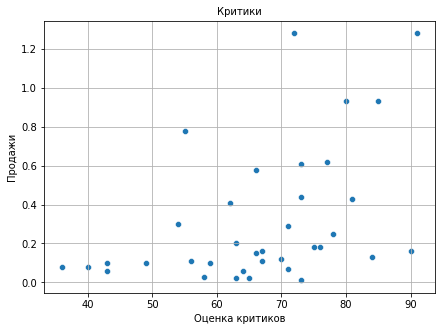

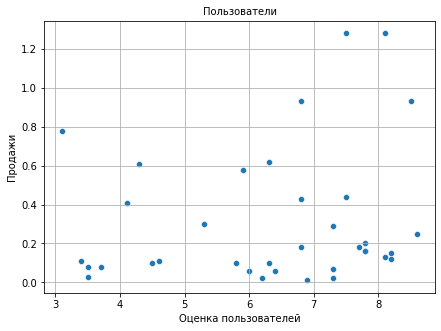

Графики для X360


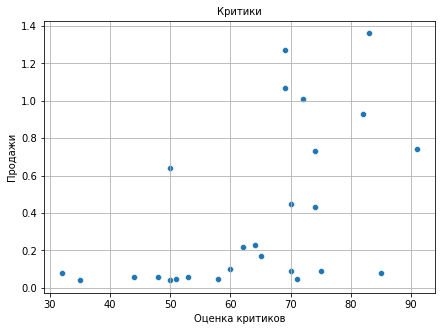

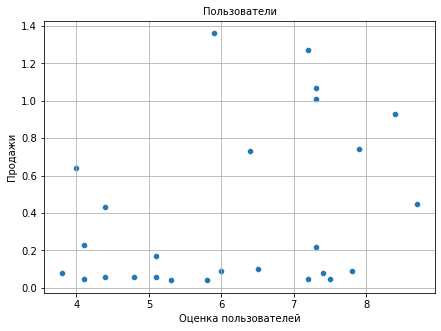

Графики для PC


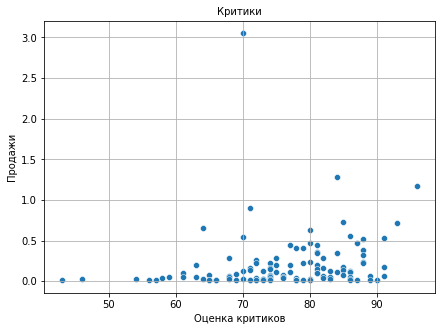

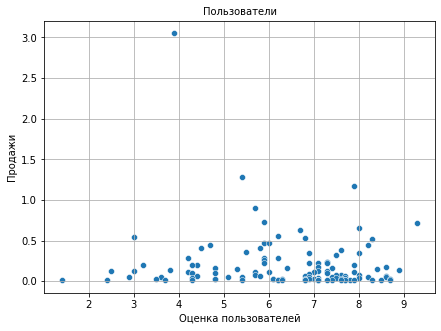

Графики для PSV


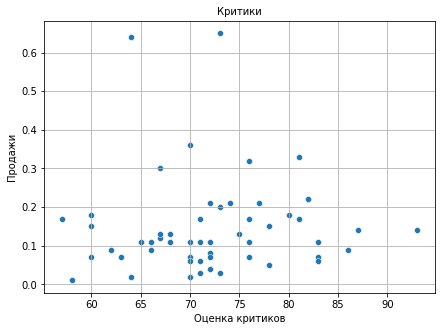

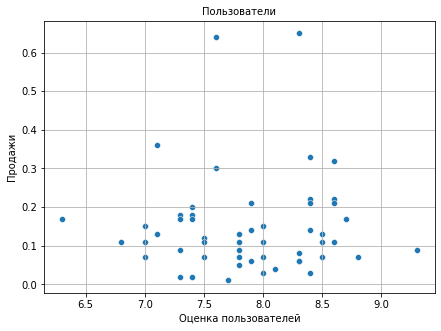

In [37]:
#построим диаграммы для каждой платформы
for p in good_df.query('platform != ["Wii", "PSP"]')['platform'].unique():#эти платформы выдают пустые таблицы, в них нет данных
    print('Графики для', p)
    a = good_df.query('platform == @p and critic_score != -1')
    plt.figure(figsize=(7, 5))
    plt.title('Критики', fontsize=10)
    sns.scatterplot(x='critic_score', y='total_sales', data=a)
    plt.ylabel('Продажи')
    plt.xlabel('Оценка критиков')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(7, 5))
    plt.title('Пользователи', fontsize=10)
    sns.scatterplot(x='user_score', y='total_sales', data=a)
    plt.ylabel('Продажи')
    plt.xlabel('Оценка пользователей')
    plt.grid(True)
    plt.show()

In [38]:
#посчитаем корреляцию для каждой платформы
for p in good_df.query('platform != ["Wii", "PSP"]')['platform'].unique():#эти платформы выдают nan корреляцию, в них нет данных
    print(p)
    a = good_df.query('platform == @p and critic_score != -1')
    print(f'Корреляция между оценкой критиков и продажами: {a.critic_score.corr(a.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {a.user_score.corr(a.total_sales):.2}')
    print()

PS4
Корреляция между оценкой критиков и продажами: 0.4
Корреляция между оценкой пользователей и продажами: -0.043

3DS
Корреляция между оценкой критиков и продажами: 0.31
Корреляция между оценкой пользователей и продажами: 0.28

XOne
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: -0.092

WiiU
Корреляция между оценкой критиков и продажами: 0.37
Корреляция между оценкой пользователей и продажами: 0.41

PS3
Корреляция между оценкой критиков и продажами: 0.45
Корреляция между оценкой пользователей и продажами: 0.16

X360
Корреляция между оценкой критиков и продажами: 0.53
Корреляция между оценкой пользователей и продажами: 0.34

PC
Корреляция между оценкой критиков и продажами: 0.17
Корреляция между оценкой пользователей и продажами: -0.09

PSV
Корреляция между оценкой критиков и продажами: 0.043
Корреляция между оценкой пользователей и продажами: 0.024



Большенство платформ показывают `умеренную` зависимость между оценкой критиков и продажами.

У `PSV` и `X360` эта зависимость `заметная`

У `ПК` эта зависимость `слабая`

Зависимость между оценкой пользователей и продажами `слабая` либо `отсутствует` и лишь у `X360` и `Wii U` она `умеренная`

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

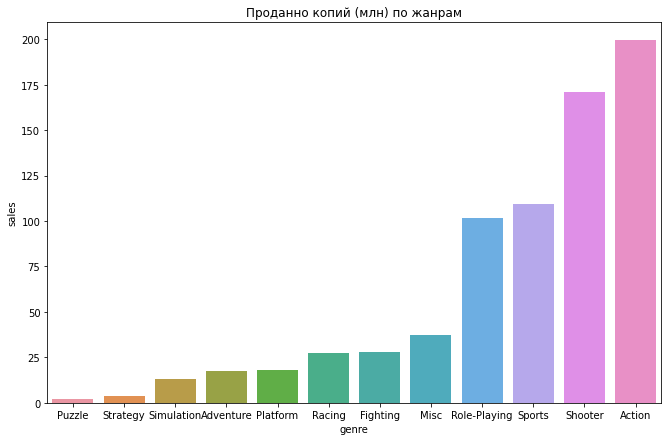

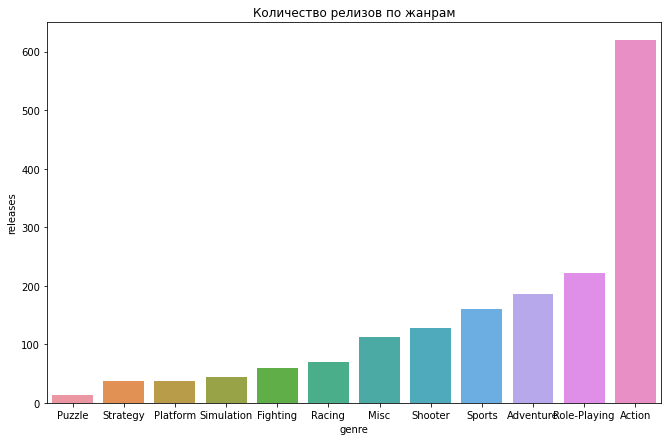

In [39]:
#сводная таблица по жанрам
genre_pt = (
    good_df
    .pivot_table(index='genre',
                 values='total_sales',
                 aggfunc=['sum', 'count']
    )
    .reset_index()
)
    
#переименуем столбцы
genre_pt.columns = ('genre', 'sales', 'releases')

#отсортируем значения
genre_pt = genre_pt.sort_values('sales') 

#построим диаграмму
plt.figure(figsize=(11,7))
sns.barplot(x=genre_pt['genre'], y=genre_pt['sales'])
plt.title('Проданно копий (млн) по жанрам');

#отсортируем значения
genre_pt = genre_pt.sort_values('releases') 

#построим диаграмму
plt.figure(figsize=(11,7))
sns.barplot(x=genre_pt['genre'], y=genre_pt['releases'])
plt.title('Количество релизов по жанрам');

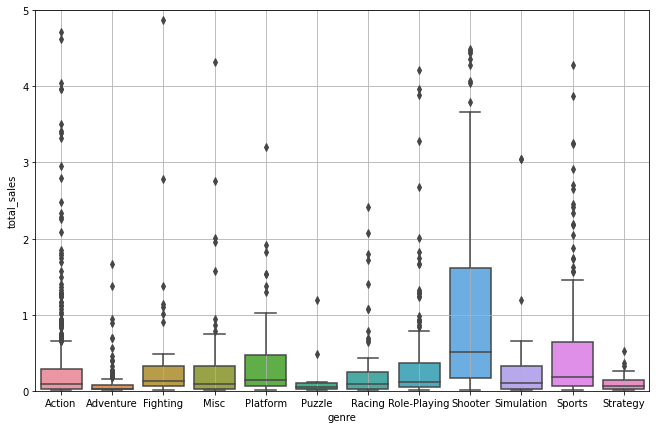

In [40]:
#построим диаграмму по продажам
plt.figure(figsize=(11,7))
sns.boxplot(y=good_df['total_sales'], x=good_df['genre'].sort_values())
plt.ylim(0,5)
plt.grid()

`Экшены` лидируют как по количеству выпущенных игр, так и по продажам, что логично, чем больше игр выпустишь, тем больше копий сможешь продать.

`Шутеры` выпуская только `треть` от релизов жанра `Экшен`, лишь не много отстают по продажам. 

Медианная продаж самая высокая у `Шутеров`, так же диаграмма размаха говорит нам, что у `Шутеров` 50% релизов продают `до 1.8 млн.` копий, когда у `Экшенов` 50% релизов продают максимум `500 тыс.` копий, верхний ус на значении `1 млн`, из этого можно сделать вывод, что основной приток продаж создают `аномальные значения`.

В тройке лидеров:
* `Шутеры` 
* `Платформеры`
* `Спорт`

С cписке отстающих:
* `Пазлы`
* `Приключения`
* `Стратегии`

Вывод:

C `1991` гожда начинается рост продаж игр, а `2000-е` годы показывют резкий рост популярности игровой индустрии. Пиком релизов является `2008` и `2009` год.

Средння продолжительность жизни платформы составляет `7 лет`. 

`PlayStation 4`, `XBox One`, `PC` являются самыми актуальными платформами, `Nintendo 3DS` и `Wii U` хоть и показывают спад, но их тоже можно рассмативать

Актуальный период для составления прогноза на `2017` год будет начиная `с 2012 по 2015` год

Оценки критиков и продаж показывает `умеренную` зависимсоть, а у `оценки пользователей` и прожами зависимость `отсутсвует`.

Наиболее актуальными жанрами будут `Шутеры`, `Платформеры`, `Спорт`. 

`Экшены` хоть и показывают, отличные продажи, но эти продажи состоят в основном из выстрелевших релизов, которых подавляющие меньшенство.


    

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* [x] Самые популярные жанры (топ-5). Поясните разницу.
* [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5).

In [41]:
#создадим собственную функцию
def analys(data, term, region_sales):
    a = (
    data.
    pivot_table(
        index=term,
        values=region_sales,
        aggfunc='sum'
    )
    .sort_values(region_sales, ascending=False)
    .reset_index()
    .head()

)
    display(a)
#построим диаграмму
    plt.figure(figsize=(10,5))
    sns.barplot(x=a[term], y=a[region_sales])
    if region_sales == 'na_sales':
        plt.title('Северная Америка')
        print('Доли продаж в регионе NA')
    if region_sales == 'jp_sales':
        plt.title('Япония')
        print('Доли продаж в регионе JP')
    if region_sales == 'eu_sales':
        plt.title('Европа')
        print('Доли продаж в регионе EU')
    else:
        print('Неизвестный регион')

    for i in a[term]:
        part = a.loc[(a[term] == i), region_sales] / sum(a[region_sales]) * 100
        part = part.round(2)
        print('Доля', i, 'от общих продаж', part)
        print()

Посмотрим продажи по платформам в `Северной Америке`

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Доли продаж в регионе NA
Неизвестный регион
Доля PS4 от общих продаж 0    39.0
Name: na_sales, dtype: float64

Доля XOne от общих продаж 1    32.14
Name: na_sales, dtype: float64

Доля X360 от общих продаж 2    11.19
Name: na_sales, dtype: float64

Доля 3DS от общих продаж 3    8.95
Name: na_sales, dtype: float64

Доля PS3 от общих продаж 4    8.72
Name: na_sales, dtype: float64



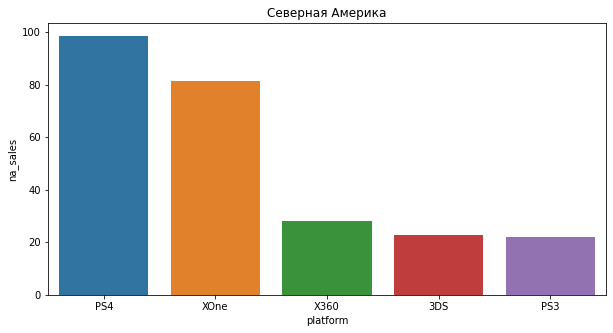

In [42]:
analys(data=good_df, term='platform', region_sales='na_sales')

В `Северной Америке` самые популярные платформы это `PlayStation 4` и `XBox One` их доли составляют `39%` и `32.1%` соответсвенно.

Самый низкий показатель у `Play Station 3` доля составляет `8.7%`

Посмотрим продажи по платформам в `Европе`

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Доли продаж в регионе EU
Доля PS4 от общих продаж 0    55.12
Name: eu_sales, dtype: float64

Доля XOne от общих продаж 1    19.6
Name: eu_sales, dtype: float64

Доля PS3 от общих продаж 2    10.83
Name: eu_sales, dtype: float64

Доля PC от общих продаж 3    7.62
Name: eu_sales, dtype: float64

Доля 3DS от общих продаж 4    6.83
Name: eu_sales, dtype: float64



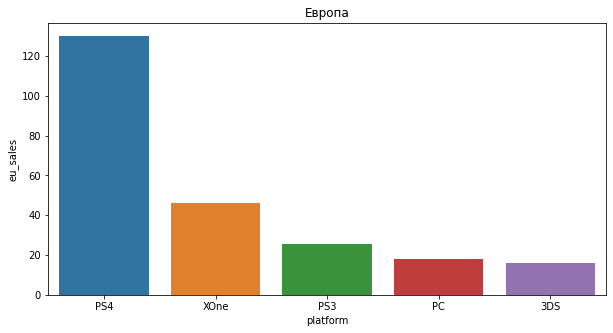

In [43]:
analys(data=good_df, term='platform', region_sales='eu_sales')

В `Европе` лидер - `PlayStaytion 4` доля этой платформы `55.1%`, доли `XBox One`, `Play Station 3` и `PC` очень близки по продажам и состовляют `19.6`, `10.8` и `7.6` соответственно. `Nintendo 3DS` с долей в `6.8%` занимает  

Посмотрим продажи по платформам в `Японии`

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Доли продаж в регионе JP
Неизвестный регион
Доля 3DS от общих продаж 0    47.92
Name: jp_sales, dtype: float64

Доля PS4 от общих продаж 1    16.27
Name: jp_sales, dtype: float64

Доля PSV от общих продаж 2    15.75
Name: jp_sales, dtype: float64

Доля PS3 от общих продаж 3    12.15
Name: jp_sales, dtype: float64

Доля WiiU от общих продаж 4    7.92
Name: jp_sales, dtype: float64



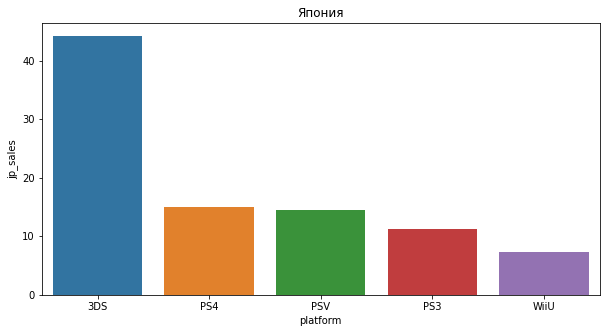

In [44]:
analys(data=good_df, term='platform', region_sales='jp_sales')

В `Японии` пользователи больше склонны к портативным платформам. Самой распространенной является `Nintendo 3DS` ее доля составляет `47.9%`, далее идет `PlayStation 4` и `PlayStation Vita` с долей `16.7%` и `15.7%`. `XBox One` и `PC` совсем не популярны в `Японии`, а последнее место топа занимает `Wii U` с долей в `7.9%`

#### Самые популярные жанры (топ-5).

Посмотрим продажи по жанрам в `Северной Америке`

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Доли продаж в регионе NA
Неизвестный регион
Доля Shooter от общих продаж 0    32.1
Name: na_sales, dtype: float64

Доля Action от общих продаж 1    29.46
Name: na_sales, dtype: float64

Доля Sports от общих продаж 2    18.74
Name: na_sales, dtype: float64

Доля Role-Playing от общих продаж 3    13.59
Name: na_sales, dtype: float64

Доля Misc от общих продаж 4    6.11
Name: na_sales, dtype: float64



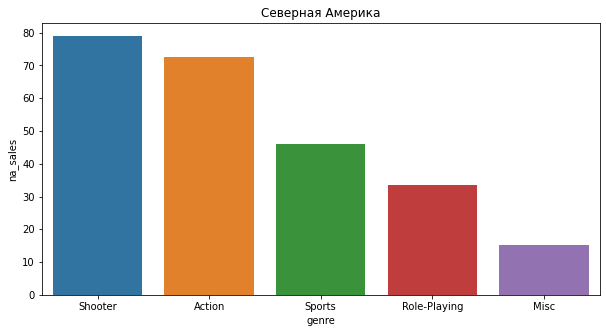

In [45]:
analys(data=good_df, term='genre', region_sales='na_sales')

В `Северной Америке` самые популярные жарны `Экшены` и `Шутеры` и `Спорт`. Хуже всего продаются `Разное`

Посмотрим продажи по жанрам в `Европе`

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Доли продаж в регионе EU
Доля Action от общих продаж 0    32.72
Name: eu_sales, dtype: float64

Доля Shooter от общих продаж 1    28.71
Name: eu_sales, dtype: float64

Доля Sports от общих продаж 2    20.04
Name: eu_sales, dtype: float64

Доля Role-Playing от общих продаж 3    12.34
Name: eu_sales, dtype: float64

Доля Racing от общих продаж 4    6.19
Name: eu_sales, dtype: float64



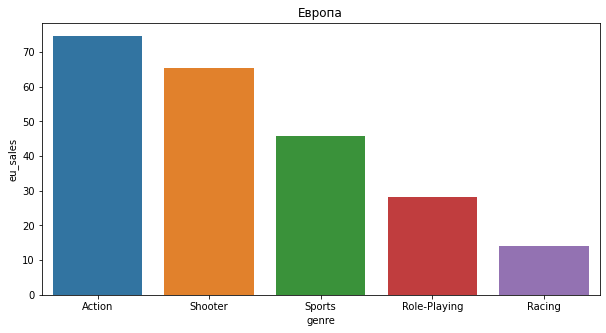

In [46]:
analys(data=good_df, term='genre', region_sales='eu_sales')

`Европейские` вкусовые предпочтения по жанрам очень похожи с `Северной Америкой`, даже по доли продаж. Здесь так же самые популярные жарны `Экшены`, `Шутеры` и `Спорт`. Хуже всего продаются `Гонки`.

Посмотрим продажи по жанрам в `Японии`

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Доли продаж в регионе JP
Неизвестный регион
Доля Role-Playing от общих продаж 0    40.16
Name: jp_sales, dtype: float64

Доля Action от общих продаж 1    38.12
Name: jp_sales, dtype: float64

Доля Fighting от общих продаж 2    8.21
Name: jp_sales, dtype: float64

Доля Misc от общих продаж 3    7.23
Name: jp_sales, dtype: float64

Доля Shooter от общих продаж 4    6.28
Name: jp_sales, dtype: float64



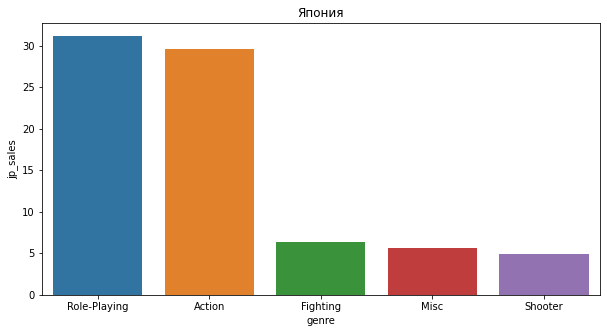

In [47]:
analys(data=good_df, term='genre', region_sales='jp_sales')

В `Японии` `Экшены` продаются с небольшим отрывом от `Ролевых игр` и занимают второе место, `Шутеры` занимаю последнюю сторчку рейтинга

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

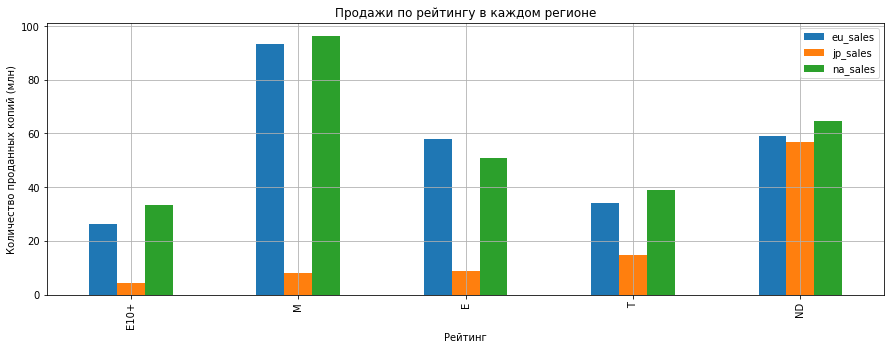

In [48]:
(
    good_df
    .pivot_table(index='rating',
                 values=['na_sales', 'eu_sales', 'jp_sales'],
                 aggfunc='sum')
    .sort_values(by='jp_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Продажи по рейтингу в каждом регионе')
plt.grid()
plt.show()

Значения рейтингов:
* `E (Everyone)` — *Для всех*
* `E10+ (Everyone 10 and older)` — *Для всех от 10 лет и старше*
* `T (Teen)` — *Подросткам*
* `M (Mature)` — *Для взрослых*
* `ND (Not Defined)` - *Не определен*

Графики показывают:
* Игры без рейтинга самые распространненые в `Японии`, а так же на втором месте в `Европе` и `Северной Америке`, это можно объяснить тем, что многие игры используют другую систему рейтинга.
* Рейтинг `E` третий по популярности в `Европе` и `Северной Америке`. 
* Рейтинг `E10+` и `T` держтатся в середине во всех странах, однако лучше всего продаются в `Северной Америке`
* Рейтинг `M` как и ожидалось этот рейтинг популярен в тех регионах (`Северная Америка и Европа`), где самыми популярными жанрами являются `Шутеры` и `Экшены` и `Спорт`

В `Японии` больше распространнена их собственная рейтинговая система `CERO` - Computer Entertainment Rating Organization

Вывод:

В `Северной Америке` самые популярные платформы это `PlayStation 4` и `XBox One`, в `Европе` лидер - `PlayStaytion 4`, в `Японии` пользователи больше склонны к портативным платформам. Самой распространенной является `Nintendo 3DS`

В `Европе` и `Северной Америке` самые популярные жарны `Экшены` и `Шутеры`, В `Японии` - `Ролевые игры`

В `Японии` больше распространнена их собственная рейтинговая система `CERO`, поэтому на первомместе по популярности игры без рейтинга, а в `Европе` и `Северной Америке` популярен жанр `Для взрослых`

### Проверьте гипотезы:
* [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

`Нулевая гипотеза`: Cредние пользовательские рейтинги `Xbox One` и седние пользовательские рейтинги `PC` одинаковые

`Альтернативная гипотеза`: Средние пользовательские рейтинги платформ `Xbox One` и cредние пользовательские рейтинги платформы `PC` разные

Значение критического уровня вероятности - `5%`.

In [49]:
alpha = .05
results = st.ttest_ind(
    good_df[(good_df['platform'] == 'XOne') & ~(good_df['user_score'].isna())]['user_score'], 
    good_df[(good_df['platform'] == 'PC') & ~(good_df['user_score'].isna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги `Xbox One` равны средним пользовательским рейтингам `PC`

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

`Нулевая гипотеза`: Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

`Альтернативная гипотеза`: Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Значение критического уровня вероятности - `5%`.

In [50]:
alpha = .05
results = st.ttest_ind(
    good_df[(good_df['genre'] == 'Action') & ~(good_df['user_score'].isna())]['user_score'], 
    good_df[(good_df['genre'] == 'Sports') & ~(good_df['user_score'].isna())]['user_score'],
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


`Нулевая гипотеза` отвергнута. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Вывод:

Пользовательские cредние пользовательские рейтинги `Xbox One` равны средним пользовательским рейтингам `PC`

Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

### Напишите общий вывод

Провели предобработку данных:

* Привели стобцы к snake_case.
* Преобразовали данные в нужные типы.
* Избавились от пропусков в столбцах name, genre, year_of_release, critic_score.
* Изменили рейинг K-A на E.
* Добавили столец с продажами во всех регионах.

Согласно исследованию:

* C `1991` года начинается рост продаж игр, а `2000-е` годы показывют резкий рост популярности игровой индустрии. Пиком релизов является `2008` и `2009` год.

* Средння продолжительность жизни платформы составляет `7`. 

* `PlayStation 4`, `XBox One`, `PC` являются самыми актуальными платформами, `Nintendo 3DS` и `Wii U` хоть и показывают спад, но их тоже можно рассмативать

* Актуальный период для составления прогноза на `2017` год будет начиная `с 2014` года

* Оценки критиков и продаж показывает умеренную зависимсоть, а у оценки пользователей и прожами зависимость отсутсвует.

* Наиболее актуальными жанрами будут `Шутеры`, `Платформеры`, `Спорт`.

* `Экшены` хоть и показывают, отличные продажи, но эти продажи состоят в основном из выстрелевших релизов, которых подавляющие меньшенство.

* В `Северной Америке` самые популярные платформы это `PlayStation 4` и `XBox One`, в `Европе` лидер - `PlayStaytion 4`, в `Японии` пользователи больше склонны к портативным платформам, самой распространенной является `Nintendo 3DS`

* В `Европе и Северной Америке` самые популярные жарны `Экшены и Шутеры`, В `Японии` - `Ролевые игры и Шутеры`

* В `Японии` больше распространнена их собственная рейтинговая система `CERO`, поэтому на первом месте по популярности игры `Без рейтинга`, а в `Европе и Северной Америке` популярен жанр `Для взрослых`

Проверили две гипотезы и сделали вывод, что:

* Пользовательские cредние пользовательские рейтинги `Xbox One` равны средним пользовательским рейтингам `PC`

* Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Рекомендации отделу маркетинга:

* Стоит учитывать популярность жанров, платформ и возрастного рейтинга в каждом регионе.

* Мнение критиков лучше влияет на продажи, чем мнение пользователей.

Для регионов Северная Америка и Европа:

* `Плафтормы`: Play Station 4, XBox One
* `Жанры`: Шутеры, Спорт
* `Рейтинг`: M, E


Для региона Япония:

* `Плафтормы`: Nintendo 3DS, Play Station 4
* `Жанр`: Ролевые игры, Драки
* `Рейтинг`: Большенсво игр используют Японскую рейтинговую систему CERO